#Questions:

○ Q1: Find the maximal delays (you should consider both ArrDelay and DepDelay) for each
month of 2007.

○ Q2: How many flights were delayed caused by security between 2000 ~ 2005? Please
show the counting for each year.

○ Q3: List Top 5 airports which occur delays most and least in 2008. (Please show the IATA
airport code)

In [1]:
!apt-get -y install openjdk-8-jre-headless
!pip install pyspark

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libnss-mdns fonts-dejavu-extra fonts-ipafont-gothic fonts-ipafont-mincho
  fonts-wqy-microhei fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jre-headless
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 28.2 MB of archives.
After this operation, 104 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 openjdk-8-jre-headless amd64 8u312-b07-0ubuntu1~18.04 [28.2 MB]
Fetched 28.2 MB in 2s (14.6 MB/s)
Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Reading database ... 156210 files and directories currently installed.)
Preparing to unpack .../openjdk-8-jre-headless_8u312-b07-0ubuntu1~18.04_amd64.deb ...
Unpacking openjdk-8-jre-headless:amd64 (8u312-b07-0ubuntu1~18.04) ...
Setting up openjdk-8-jre-headless:amd64 (8u312-b07-0ubunt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark import SparkConf, SparkContext

In [4]:
spark = SparkSession.builder.master("local[*]").appName("HW").getOrCreate()
sparkcontext = spark.sparkContext

In [5]:
import pandas as pd
path0 = '/content/drive/MyDrive/01_GMBA/2nd_semester(2022)/03-1AM_Big Data Analytics Techniques and Applications/0323_0406HW2/HW2/dataset/2000.csv'
path1 = '/content/drive/MyDrive/01_GMBA/2nd_semester(2022)/03-1AM_Big Data Analytics Techniques and Applications/0323_0406HW2/HW2/dataset/2001.csv'
path2 = '/content/drive/MyDrive/01_GMBA/2nd_semester(2022)/03-1AM_Big Data Analytics Techniques and Applications/0323_0406HW2/HW2/dataset/2002.csv'
path3 = '/content/drive/MyDrive/01_GMBA/2nd_semester(2022)/03-1AM_Big Data Analytics Techniques and Applications/0323_0406HW2/HW2/dataset/2003.csv'
path4 = '/content/drive/MyDrive/01_GMBA/2nd_semester(2022)/03-1AM_Big Data Analytics Techniques and Applications/0323_0406HW2/HW2/dataset/2004.csv'
path5 = '/content/drive/MyDrive/01_GMBA/2nd_semester(2022)/03-1AM_Big Data Analytics Techniques and Applications/0323_0406HW2/HW2/dataset/2005.csv'
path7 = '/content/drive/MyDrive/01_GMBA/2nd_semester(2022)/03-1AM_Big Data Analytics Techniques and Applications/0323_0406HW2/HW2/dataset/2007.csv'
path8 = '/content/drive/MyDrive/01_GMBA/2nd_semester(2022)/03-1AM_Big Data Analytics Techniques and Applications/0323_0406HW2/HW2/dataset/2008.csv'

# data
data_0 = spark.read.csv(path0, header=True, inferSchema=True)
data_1 = spark.read.csv(path1, header=True, inferSchema=True)
data_2 = spark.read.csv(path2, header=True, inferSchema=True)
data_3 = spark.read.csv(path3, header=True, inferSchema=True)
data_4 = spark.read.csv(path4, header=True, inferSchema=True)
data_5 = spark.read.csv(path5, header=True, inferSchema=True)
data_7 = spark.read.csv(path7, header=True, inferSchema=True)
data_8 = spark.read.csv(path8, header=True, inferSchema=True)
data_8

DataFrame[Year: int, Month: int, DayofMonth: int, DayOfWeek: int, DepTime: string, CRSDepTime: int, ArrTime: string, CRSArrTime: int, UniqueCarrier: string, FlightNum: int, TailNum: string, ActualElapsedTime: string, CRSElapsedTime: string, AirTime: string, ArrDelay: string, DepDelay: string, Origin: string, Dest: string, Distance: int, TaxiIn: string, TaxiOut: string, Cancelled: int, CancellationCode: string, Diverted: int, CarrierDelay: string, WeatherDelay: string, NASDelay: string, SecurityDelay: string, LateAircraftDelay: string]

## Q1: Find the maximal delays (you should consider both ArrDelay and DepDelay) for each month of 2007.

### Pyspark

In [ ]:
data1 = data_7[['Month', 'ArrDelay', 'DepDelay']]
data1

DataFrame[Month: int, ArrDelay: string, DepDelay: string]

In [ ]:
data1 = data1.dropna()
data1

DataFrame[Month: int, ArrDelay: string, DepDelay: string]

In [ ]:
from pyspark.sql.functions import col
data1 = data1.select(*(col(c).cast("float").alias(c) for c in data1.columns))

In [ ]:
data1

DataFrame[Month: float, ArrDelay: float, DepDelay: float]

In [ ]:
Maximal_ArrDelay = []
Maximal_DepDelay = []
Maximal_ArrDelay_DepDelay = []
m = []
for i in range(1,13):
  m.append(i)
  dm = data1[data1["Month"]==i]
  A = dm.agg({'ArrDelay': 'max'}).collect()
  for col in A:
    Maximal_ArrDelay.append(col["max(ArrDelay)"])
  D = dm.agg({'DepDelay': 'max'}).collect()
  for col in D:
    Maximal_DepDelay.append(col["max(DepDelay)"])
for i in range(0,12):
  T = Maximal_ArrDelay[i]+Maximal_DepDelay[i]
  Maximal_ArrDelay_DepDelay.append(T)

print(Maximal_ArrDelay)
print(Maximal_DepDelay)
print(Maximal_ArrDelay_DepDelay)

[1426.0, 1359.0, 1564.0, 1402.0, 1429.0, 1351.0, 1386.0, 1472.0, 1665.0, 2598.0, 1146.0, 1942.0]
[1406.0, 1340.0, 1547.0, 1415.0, 1416.0, 1360.0, 1369.0, 1449.0, 1689.0, 2601.0, 1137.0, 1956.0]
[2832.0, 2699.0, 3111.0, 2817.0, 2845.0, 2711.0, 2755.0, 2921.0, 3354.0, 5199.0, 2283.0, 3898.0]


In [ ]:
d = {'Month': m, 'Maximal_ArrDelay': Maximal_ArrDelay, 'Maximal_DepDelay': Maximal_DepDelay, 'Maximal_ArrDelay+DepDelay': Maximal_ArrDelay_DepDelay}
data2 = pd.DataFrame(data=d)
data2

,Month,Maximal_ArrDelay,Maximal_DepDelay,Maximal_ArrDelay+DepDelay
0,1,1426.0,1406.0,2832.0
1,2,1359.0,1340.0,2699.0
2,3,1564.0,1547.0,3111.0
3,4,1402.0,1415.0,2817.0
4,5,1429.0,1416.0,2845.0
5,6,1351.0,1360.0,2711.0
6,7,1386.0,1369.0,2755.0
7,8,1472.0,1449.0,2921.0
8,9,1665.0,1689.0,3354.0
9,10,2598.0,2601.0,5199.0


Text(0, 0.5, 'minute(s)')

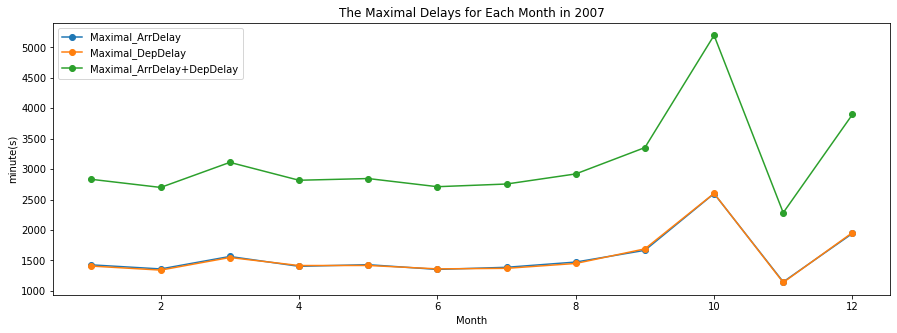

In [ ]:
ax = data2.plot(x='Month', y=['Maximal_ArrDelay', 'Maximal_DepDelay', 'Maximal_ArrDelay+DepDelay'], 
             kind="line", style="-o", figsize=(15,5))
ax.set_title("The Maximal Delays for Each Month in 2007")
ax.set_ylabel('minute(s)')

From the table and the figure shown above, we can see that in 2007,
1.	The largest arrival delay happens in October when the enormous departure delay occurs.
2.	The smallest arrival delay and the most negligible departure delay occurred in November.
3.	The maximal delays in January to September and November are smaller than the maximal delays in October and December.

### Python

In [ ]:
data1 = data[['Month', 'ArrDelay', 'DepDelay']]
data1

,Month,ArrDelay,DepDelay
0,1,1.0,7.0
1,1,8.0,13.0
2,1,34.0,36.0
3,1,26.0,30.0
4,1,-3.0,1.0
...,...,...,...
7453210,12,13.0,-7.0
7453211,12,5.0,11.0
7453212,12,15.0,-1.0
7453213,12,36.0,38.0


In [ ]:
data1 = data1.dropna()
data1

,Month,ArrDelay,DepDelay
0,1,1.0,7.0
1,1,8.0,13.0
2,1,34.0,36.0
3,1,26.0,30.0
4,1,-3.0,1.0
...,...,...,...
7453210,12,13.0,-7.0
7453211,12,5.0,11.0
7453212,12,15.0,-1.0
7453213,12,36.0,38.0


In [ ]:
Maximal_ArrDelay = []
Maximal_DepDelay = []
Maximal_ArrDelay_DepDelay = []
m = []
for i in range(1,13):
  m.append(i)
  dm = data1[data1["Month"]==i]
  A = dm[['ArrDelay']].values.max()
  # A = data_c[data_c["Month"]==i].sum()["ArrDelay1"]
  Maximal_ArrDelay.append(A)
  D = dm[['DepDelay']].values.max()
  # D = data_c[data_c["Month"]==i].sum()["DepDelay1"]
  Maximal_DepDelay.append(D)
  T = A+D
  Maximal_ArrDelay_DepDelay.append(T)

d = {'Month': m, 'Maximal_ArrDelay': Maximal_ArrDelay, 'Maximal_DepDelay': Maximal_DepDelay, 'Maximal_ArrDelay+DepDelay': Maximal_ArrDelay_DepDelay}
data2 = pd.DataFrame(data=d)
data2

,Month,Maximal_ArrDelay,Maximal_DepDelay,Maximal_ArrDelay+DepDelay
0,1,1426.0,1406.0,2832.0
1,2,1359.0,1340.0,2699.0
2,3,1564.0,1547.0,3111.0
3,4,1402.0,1415.0,2817.0
4,5,1429.0,1416.0,2845.0
5,6,1351.0,1360.0,2711.0
6,7,1386.0,1369.0,2755.0
7,8,1472.0,1449.0,2921.0
8,9,1665.0,1689.0,3354.0
9,10,2598.0,2601.0,5199.0


Text(0, 0.5, 'minute(s)')

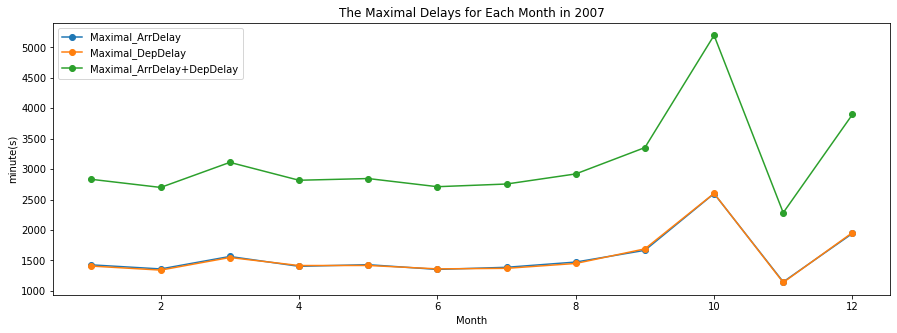

In [ ]:
ax = data2.plot(x='Month', y=['Maximal_ArrDelay', 'Maximal_DepDelay', 'Maximal_ArrDelay+DepDelay'], 
             kind="line", style="-o", figsize=(15,5))
ax.set_title("The Maximal Delays for Each Month in 2007")
ax.set_ylabel('minute(s)')

From the table and the figure shown above, we can see that in 2007,
1.	The largest arrival delay happens in October when the enormous departure delay occurs.
2.	The smallest arrival delay and the most negligible departure delay occurred in November.
3.	The maximal delays in January to September and November are smaller than the maximal delays in October and December.


## Q2: How many flights were delayed caused by security between 2000 ~ 2005? Please show the counting for each year.

### Pyspark

In [ ]:
data_1.show()

+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|2001|    1|        17|        3|   1806|      1810|   1931|      1934|           US|      375

In [ ]:
df0 = data_0.select('SecurityDelay')
df1 = data_1.select('SecurityDelay')
df2 = data_2.select('SecurityDelay')
df3 = data_3.select('SecurityDelay')
df4 = data_4.select('SecurityDelay')
df5 = data_5.select('SecurityDelay')

In [ ]:
d0 = df0.filter(df0.SecurityDelay > 0).collect()
d1 = df1.filter(df1.SecurityDelay > 0).collect()
d2 = df2.filter(df2.SecurityDelay > 0).collect()
d3 = df3.filter(df3.SecurityDelay > 0).collect()
d4 = df4.filter(df4.SecurityDelay > 0).collect()
d5 = df5.filter(df5.SecurityDelay > 0).collect()

In [ ]:
df_security = []
data_list = [d0, d1, d2, d3, d4, d5]
year = []
count = []
y = 1999
c = 0
for i in range(0, 6):
  for col in data_list[i]:
    # print(col)
    if col["SecurityDelay"] != 0:
      df_security.append(col["SecurityDelay"])
      c = c+1
  count.append(c)
  c = 0
  y = y+1
  year.append(y)
print(year)
print(count)

[2000, 2001, 2002, 2003, 2004, 2005]
[0, 0, 0, 3740, 8158, 6627]


In [ ]:
d = {'Year': year, 'Count_SecurityDelay': count}
data2 = pd.DataFrame(data=d)
data2

,Year,Count_SecurityDelay
0,2000,0
1,2001,0
2,2002,0
3,2003,3740
4,2004,8158
5,2005,6627


Text(0, 0.5, 'Count')

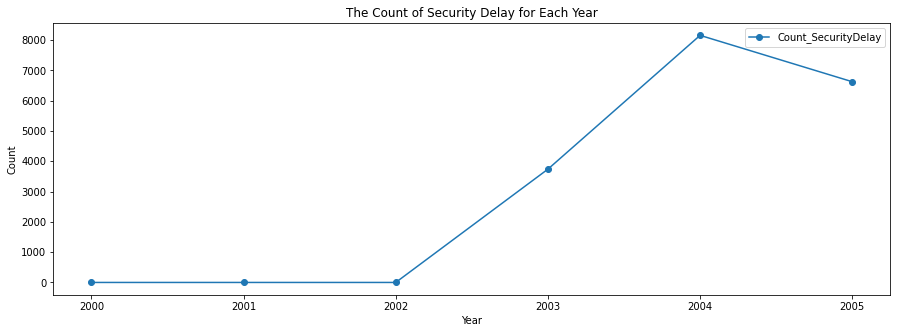

In [ ]:
ax = data2.plot(x='Year', y='Count_SecurityDelay', 
             kind="line", style="-o", figsize=(15,5))
ax.set_title("The Count of Security Delay for Each Year")
ax.set_ylabel('Count')

From the table and the figure above, we can find that
1.	There are no security delays from 2000 to 2002 in-flight records. However, I think this may occur due to the missing data or because they did not record if a delayed flight was caused by security before 2003.
2.	There were more and more security delays from 2003 to 2004, which may be partially driven by the increase in the total number of flights and the increasing security policy.
3.	As we can see on the graph, the Year 2004 conducted the most count of security delays than the other year.


## ○ Q3: List Top 5 airports which occur delays most and least in 2008. (Please show the IATA airport code)

### Pyspark

In [63]:
data1 = data_8[['Month', 'ArrDelay', 'DepDelay', 'Origin', 'Dest']]
data1

DataFrame[Month: int, ArrDelay: string, DepDelay: string, Origin: string, Dest: string]

In [64]:
data1.show()

+-----+--------+--------+------+----+
|Month|ArrDelay|DepDelay|Origin|Dest|
+-----+--------+--------+------+----+
|    1|     -14|       8|   IAD| TPA|
|    1|       2|      19|   IAD| TPA|
|    1|      14|       8|   IND| BWI|
|    1|      -6|      -4|   IND| BWI|
|    1|      34|      34|   IND| BWI|
|    1|      11|      25|   IND| JAX|
|    1|      57|      67|   IND| LAS|
|    1|     -18|      -1|   IND| LAS|
|    1|       2|       2|   IND| MCI|
|    1|     -16|       0|   IND| MCI|
|    1|       1|       6|   IND| MCO|
|    1|      80|      94|   IND| MCO|
|    1|       1|      -4|   IND| MDW|
|    1|      10|       0|   IND| MDW|
|    1|      -4|       2|   IND| MDW|
|    1|      11|       9|   IND| MDW|
|    1|      15|      27|   IND| PHX|
|    1|     -15|       9|   IND| PHX|
|    1|      16|      28|   IND| TPA|
|    1|      37|      51|   ISP| BWI|
+-----+--------+--------+------+----+
only showing top 20 rows



In [65]:
data1.count()

7009728

In [66]:
data1 = data1.withColumn('DepDelay',data1.DepDelay.cast('float'))
data1 = data1.withColumn('ArrDelay',data1.ArrDelay.cast('float'))

data1

DataFrame[Month: int, ArrDelay: float, DepDelay: float, Origin: string, Dest: string]

In [67]:
data2 = data1.filter(data1.ArrDelay > 0)
data2.show()
data2.count()

+-----+--------+--------+------+----+
|Month|ArrDelay|DepDelay|Origin|Dest|
+-----+--------+--------+------+----+
|    1|     2.0|    19.0|   IAD| TPA|
|    1|    14.0|     8.0|   IND| BWI|
|    1|    34.0|    34.0|   IND| BWI|
|    1|    11.0|    25.0|   IND| JAX|
|    1|    57.0|    67.0|   IND| LAS|
|    1|     2.0|     2.0|   IND| MCI|
|    1|     1.0|     6.0|   IND| MCO|
|    1|    80.0|    94.0|   IND| MCO|
|    1|     1.0|    -4.0|   IND| MDW|
|    1|    10.0|     0.0|   IND| MDW|
|    1|    11.0|     9.0|   IND| MDW|
|    1|    15.0|    27.0|   IND| PHX|
|    1|    16.0|    28.0|   IND| TPA|
|    1|    37.0|    51.0|   ISP| BWI|
|    1|    19.0|    32.0|   ISP| BWI|
|    1|     6.0|    20.0|   ISP| BWI|
|    1|    14.0|    25.0|   ISP| BWI|
|    1|    47.0|    87.0|   ISP| FLL|
|    1|     4.0|    29.0|   ISP| FLL|
|    1|    64.0|    82.0|   ISP| MCO|
+-----+--------+--------+------+----+
only showing top 20 rows



2979504

In [68]:
data3 = data1.filter(data1.DepDelay > 0)
data3.show()
data3.count()

+-----+--------+--------+------+----+
|Month|ArrDelay|DepDelay|Origin|Dest|
+-----+--------+--------+------+----+
|    1|   -14.0|     8.0|   IAD| TPA|
|    1|     2.0|    19.0|   IAD| TPA|
|    1|    14.0|     8.0|   IND| BWI|
|    1|    34.0|    34.0|   IND| BWI|
|    1|    11.0|    25.0|   IND| JAX|
|    1|    57.0|    67.0|   IND| LAS|
|    1|     2.0|     2.0|   IND| MCI|
|    1|     1.0|     6.0|   IND| MCO|
|    1|    80.0|    94.0|   IND| MCO|
|    1|    -4.0|     2.0|   IND| MDW|
|    1|    11.0|     9.0|   IND| MDW|
|    1|    15.0|    27.0|   IND| PHX|
|    1|   -15.0|     9.0|   IND| PHX|
|    1|    16.0|    28.0|   IND| TPA|
|    1|    37.0|    51.0|   ISP| BWI|
|    1|    -3.0|     1.0|   ISP| BWI|
|    1|    19.0|    32.0|   ISP| BWI|
|    1|     6.0|    20.0|   ISP| BWI|
|    1|    -7.0|     9.0|   ISP| BWI|
|    1|    -8.0|     1.0|   ISP| BWI|
+-----+--------+--------+------+----+
only showing top 20 rows



2700974

In [69]:
data_ori = data1.select('Origin').distinct().collect() 
data_des = data1.select('Dest').distinct().collect()
data_des

[Row(Dest='BGM'),
 Row(Dest='PSE'),
 Row(Dest='MSY'),
 Row(Dest='GEG'),
 Row(Dest='BUR'),
 Row(Dest='SNA'),
 Row(Dest='GRB'),
 Row(Dest='GTF'),
 Row(Dest='IDA'),
 Row(Dest='GRR'),
 Row(Dest='EUG'),
 Row(Dest='PSG'),
 Row(Dest='PVD'),
 Row(Dest='GSO'),
 Row(Dest='MYR'),
 Row(Dest='OAK'),
 Row(Dest='MSN'),
 Row(Dest='COD'),
 Row(Dest='BTM'),
 Row(Dest='FAR'),
 Row(Dest='FSM'),
 Row(Dest='MQT'),
 Row(Dest='SCC'),
 Row(Dest='DCA'),
 Row(Dest='RFD'),
 Row(Dest='MLU'),
 Row(Dest='CID'),
 Row(Dest='LWS'),
 Row(Dest='GTR'),
 Row(Dest='WRG'),
 Row(Dest='HLN'),
 Row(Dest='LEX'),
 Row(Dest='RDM'),
 Row(Dest='FLO'),
 Row(Dest='ORF'),
 Row(Dest='SCE'),
 Row(Dest='EVV'),
 Row(Dest='KTN'),
 Row(Dest='CRW'),
 Row(Dest='CWA'),
 Row(Dest='SAV'),
 Row(Dest='TRI'),
 Row(Dest='CDV'),
 Row(Dest='CMH'),
 Row(Dest='MOD'),
 Row(Dest='CAK'),
 Row(Dest='TYR'),
 Row(Dest='ADK'),
 Row(Dest='CHO'),
 Row(Dest='MOB'),
 Row(Dest='PNS'),
 Row(Dest='MCN'),
 Row(Dest='CEC'),
 Row(Dest='LIH'),
 Row(Dest='IAH'),
 Row(Dest=

In [70]:
count1 = 0
for col1 in data_ori:
  count1 = count1 + 1

print(count1)

count2 = 0
for col1 in data_des:
  count2 = count2 + 1

print(count2)


303
304


In [ ]:
Origin = []
Dest = []
for i, j in zip(data_ori, data_des):
  Origin.append(i['Origin']) 
  Dest.append(j['Dest'])

# print(Origin)
# print(Dest)

In [81]:
OriginDelay_count = []
DestDelay_count = []
# OriginDelay_Max = [] 
# OriginDelay_Min = []
# DestDelay_Max = []
# DestDelay_Min = []
for i in Origin:
  A1 = data2.filter(data2.Origin == i)
  A2 = A1.count()
  OriginDelay_count.append(A2)
  # A3 = A1.agg({"ArrDelay": "max"}).collect()[0]
  # A4 = A1.agg({"ArrDelay": "min"}).collect()[0]
  # OriginDelay_Max.append(A3["max(ArrDelay)"])
  # OriginDelay_Min.append(A4["min(ArrDelay)"]) 

for j in Dest:
  D1 = data3.filter(data3.Dest == j)
  D2 = D1.count()
  DestDelay_count.append(D2)
  # D3 = D1.agg({"DepDelay": "max"}).collect()[0]
  # D4 = D1.agg({"DepDelay": "min"}).collect()[0]
  # DestDelay_Max.append(D3["max(DepDelay)"])
  # DestDelay_Min.append(D4["min(DepDelay)"]) 

# print(OriginDelay_count)
# print(DestDelay_count)

In [82]:
d1 = {'Airport_Origin': Origin, 'OriginDelay_count': OriginDelay_count}
data_ori_count = pd.DataFrame(data=d1)
# data_ori_count

In [83]:
d2 = {'Airport_Dest': Dest, 'DestDelay_count': DestDelay_count}
data_des_count = pd.DataFrame(data=d2)
# data_des_count

In [84]:
data_ori_count_top5 = data_ori_count.sort_values('OriginDelay_count', ascending=False).head(5)
data_des_count_top5 = data_des_count.sort_values('DestDelay_count', ascending=False).head(5)

In [ ]:
data_ori_count_top5

,Airport_Origin,OriginDelay_count
0,ATL,204157
1,ORD,167536
2,DFW,134254
3,DEN,110344
4,LAX,86615


In [ ]:
data_des_count_top5

,Airport_Dest,DestDelay_count
0,ATL,143629
1,ORD,135780
2,DFW,95262
3,DEN,89988
4,LAX,89000


Text(0, 0.5, 'Count')

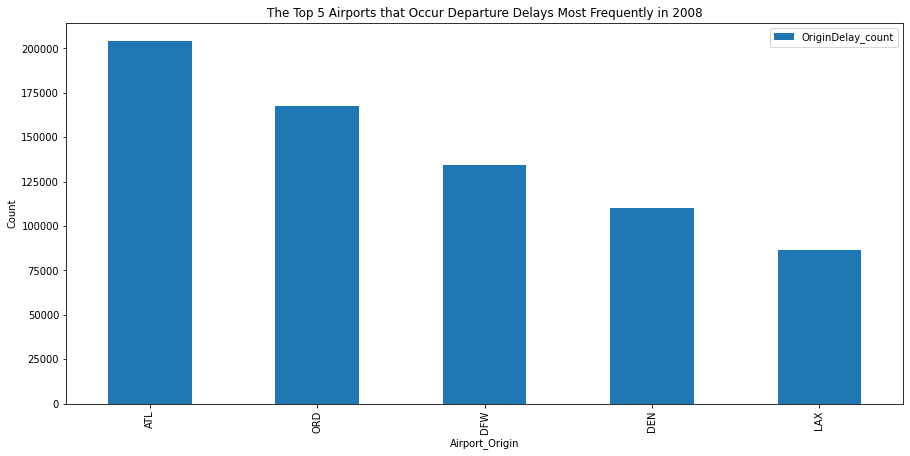

In [ ]:
ax = data_ori_count_top5.plot(x='Airport_Origin', y='OriginDelay_count', kind="bar", figsize=(15,7))
ax.set_title("The Top 5 Airports that Occur Departure Delays Most Frequently in 2008")
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

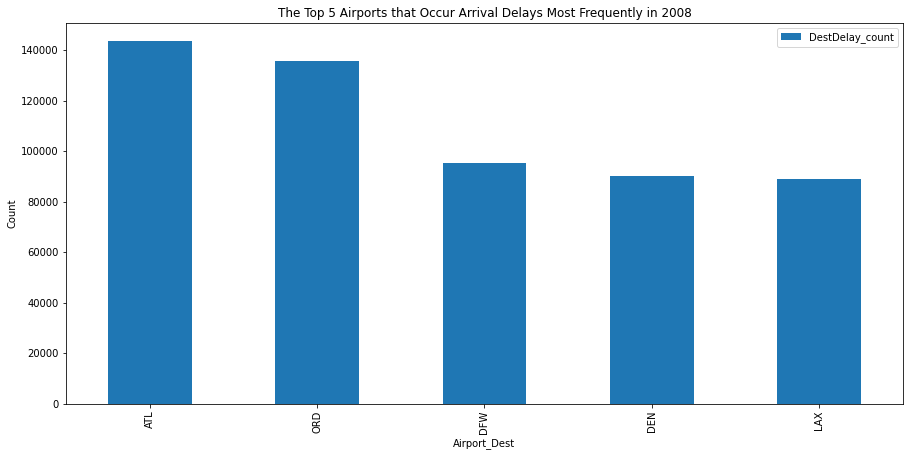

In [ ]:
ax = data_des_count_top5.plot(x='Airport_Dest', y='DestDelay_count', kind="bar", figsize=(15,7))
ax.set_title("The Top 5 Airports that Occur Arrival Delays Most Frequently in 2008")
ax.set_ylabel('Count')

In [85]:
data_ori_count_least5 = data_ori_count.sort_values('OriginDelay_count').head(5)
data_des_count_least5 = data_des_count.sort_values('DestDelay_count').head(5)

In [86]:
data_ori_count_least5

,Airport_Origin,OriginDelay_count
5,PUB,2
6,PIR,3
7,TUP,3
8,INL,11
9,BJI,12


In [87]:
data_des_count_least5

,Airport_Dest,DestDelay_count
5,OGD,1
6,CYS,1
7,TUP,1
8,PIR,3
9,BJI,15


Text(0, 0.5, 'Count')

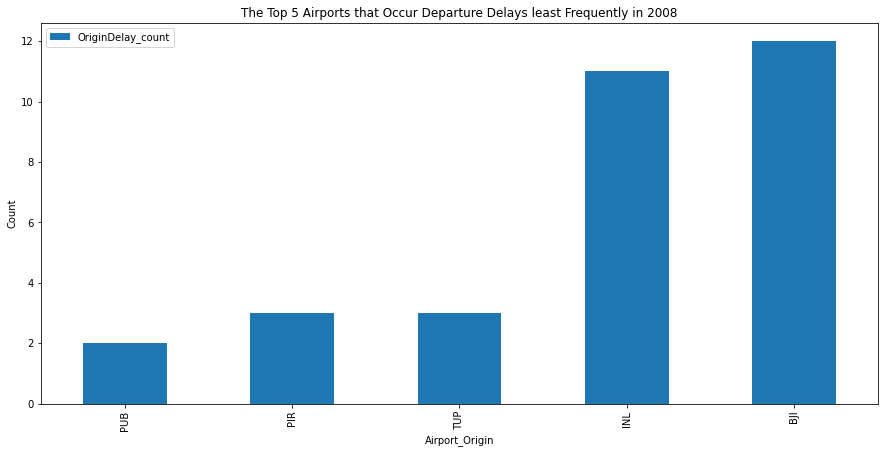

In [88]:
ax = data_ori_count_least5.plot(x='Airport_Origin', y='OriginDelay_count', kind="bar", figsize=(15,7))
ax.set_title("The Top 5 Airports that Occur Departure Delays least Frequently in 2008")
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

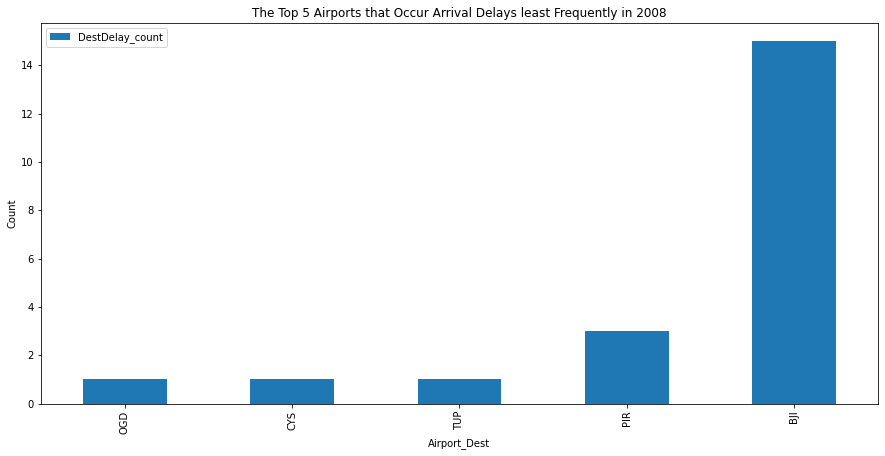

In [89]:
ax = data_des_count_least5.plot(x='Airport_Dest', y='DestDelay_count', kind="bar", figsize=(15,7))
ax.set_title("The Top 5 Airports that Occur Arrival Delays least Frequently in 2008")
ax.set_ylabel('Count')

The top 5 airports that occurs delay the most times are the same for departure delay and arrival delay in 2008, which are

1.   ATL - William B Hartsfield-Atlanta Intl Airport in Atlanta

2.   ORD - Chicago O’Hare International Airport in Chicago

3.   DFW - Dallas-Fort Worth International Airport in Dallas-Fort Worth

4.   DEN - Denver Intl Airport in Denver

5.   LAX - Los Angeles International in Los Angeles

The top 5 airports that occurs the least times of departure delay and arrival delay in 2008, which are

o	The Top 5 Airports that Occur Departure Delays least Frequently in 2008
1.	PUB - Pueblo Memorial Airport in Colorado
2.	PIR - Pierre Regional Airport in South Dakota
3.	TUP - Tupelo Regional Airport in Mississippi
4.	INL - Falls International Airport in Minnesota
5.	BJI - Bemidji Regional Airport in Minnesota

o	The Top 5 Airports that Occur Arrival Delays least Frequently in 2008
1.	OGD - Ogden-Hinckley Airport in Utah
2.	TUP - Tupelo Regional Airport in Mississippi
3.	CYS - Cheyenne Regional Airport in Wyoming
4.	BJI - Bemidji Regional Airport in Minnesota
5.	INL - Falls International Airport in Minnesota


In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/01_GMBA/2nd_semester(2022)/03-1AM_Big Data Analytics Techniques and Applications/0323_0406HW2/HW2/dataset/2008.csv'
data_q3 = pd.read_csv(path, thousands=',', encoding='latin1')
data_q3

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009723,2008,12,13,6,1002.0,959,1204.0,1150,DL,1636,...,6.0,45.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009724,2008,12,13,6,834.0,835,1021.0,1023,DL,1637,...,5.0,23.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009725,2008,12,13,6,655.0,700,856.0,856,DL,1638,...,24.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,...,13.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
data1 = data_q3[['Month', 'ArrDelay', 'DepDelay', 'Origin', 'Dest']]
data1

,Month,ArrDelay,DepDelay,Origin,Dest
0,1,-14.0,8.0,IAD,TPA
1,1,2.0,19.0,IAD,TPA
2,1,14.0,8.0,IND,BWI
3,1,-6.0,-4.0,IND,BWI
4,1,34.0,34.0,IND,BWI
...,...,...,...,...,...
7009723,12,14.0,3.0,ATL,IAD
7009724,12,-2.0,-1.0,ATL,SAT
7009725,12,0.0,-5.0,PBI,ATL
7009726,12,9.0,11.0,IAD,ATL


In [ ]:
data1.isnull().sum()

Month            0
ArrDelay    154699
DepDelay    136246
Origin           0
Dest             0
dtype: int64

In [ ]:
ArrDelay1 = []
for i in data1.ArrDelay:
  if i > 0:
    ArrDelay1.append(1)
  else:
    ArrDelay1.append(0)
# ArrDelay1.append(data1)

DepDelay1 = []
for i in data1.DepDelay:
  if i > 0:
    DepDelay1.append(1)
  else:
    DepDelay1.append(0)
# DepDelay1.append(data1)

d = {'ArrDelay1': ArrDelay1, 'DepDelay1': DepDelay1}
data2 = pd.DataFrame(data=d)
data2

,ArrDelay1,DepDelay1
0,0,1
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
7009723,1,1
7009724,0,0
7009725,0,0
7009726,1,1


In [ ]:
data_c = pd.concat([data1, data2], axis=1)
data_c

,Month,ArrDelay,DepDelay,Origin,Dest,ArrDelay1,DepDelay1
0,1,-14.0,8.0,IAD,TPA,0,1
1,1,2.0,19.0,IAD,TPA,1,1
2,1,14.0,8.0,IND,BWI,1,1
3,1,-6.0,-4.0,IND,BWI,0,0
4,1,34.0,34.0,IND,BWI,1,1
...,...,...,...,...,...,...,...
7009723,12,14.0,3.0,ATL,IAD,1,1
7009724,12,-2.0,-1.0,ATL,SAT,0,0
7009725,12,0.0,-5.0,PBI,ATL,0,0
7009726,12,9.0,11.0,IAD,ATL,1,1


In [ ]:
data_c['Origin'].nunique()

303

In [ ]:
data_c['Dest'].nunique()

304

In [ ]:
data_ori = pd.unique(data_c['Origin'])
data_des = pd.unique(data_c['Dest'])

OriginDelay_count = []
DestDelay_count = []
Origin = []
Dest = []
for i, j in zip(data_ori, data_des):
  Origin.append(i)
  Dest.append(j)
  A = data_c[data_c["Origin"]==i].sum()["ArrDelay1"]
  OriginDelay_count.append(A)
  D = data_c[data_c["Dest"]==j].sum()["DepDelay1"]
  DestDelay_count.append(D)

d1 = {'Airport_Origin': Origin, 'OriginDelay_count': OriginDelay_count}
data_ori_count = pd.DataFrame(data=d1)
data_ori_count


,Airport_Origin,OriginDelay_count
0,IAD,34835
1,IND,16883
2,ISP,3885
3,JAN,4759
4,JAX,12891
...,...,...
298,LMT,251
299,OTH,357
300,ITH,89
301,HTS,21


In [ ]:
d2 = {'Airport_Dest': Dest, 'DestDelay_count': DestDelay_count}
data_des_count = pd.DataFrame(data=d2)
data_des_count

,Airport_Dest,DestDelay_count
0,TPA,33863
1,BWI,44961
2,JAX,13264
3,LAS,76174
4,MCI,26422
...,...,...
298,GST,57
299,LMT,223
300,OTH,272
301,ITH,21


In [ ]:
data_ori_count_top5 = data_ori_count.sort_values('OriginDelay_count', ascending=False).head(5)
data_des_count_top5 = data_des_count.sort_values('DestDelay_count', ascending=False).head(5)

In [ ]:
data_ori_count_top5

,Airport_Origin,OriginDelay_count
115,ATL,204157
66,ORD,167536
116,DFW,134254
57,DEN,110344
6,LAX,86615


In [ ]:
data_des_count_top5

,Airport_Dest,DestDelay_count
72,ATL,143629
112,ORD,135780
87,DFW,95262
27,DEN,89988
32,LAX,89000


Text(0, 0.5, 'Count')

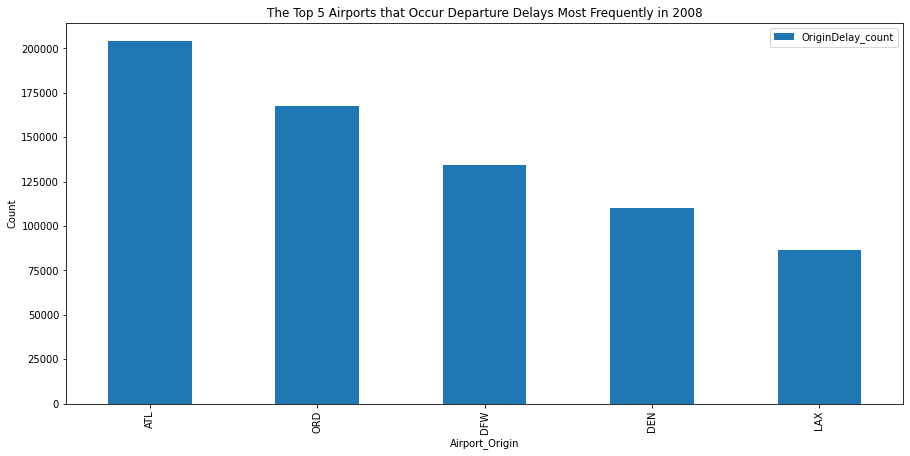

In [ ]:
ax = data_ori_count_top5.plot(x='Airport_Origin', y='OriginDelay_count', kind="bar", figsize=(15,7))
ax.set_title("The Top 5 Airports that Occur Departure Delays Most Frequently in 2008")
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

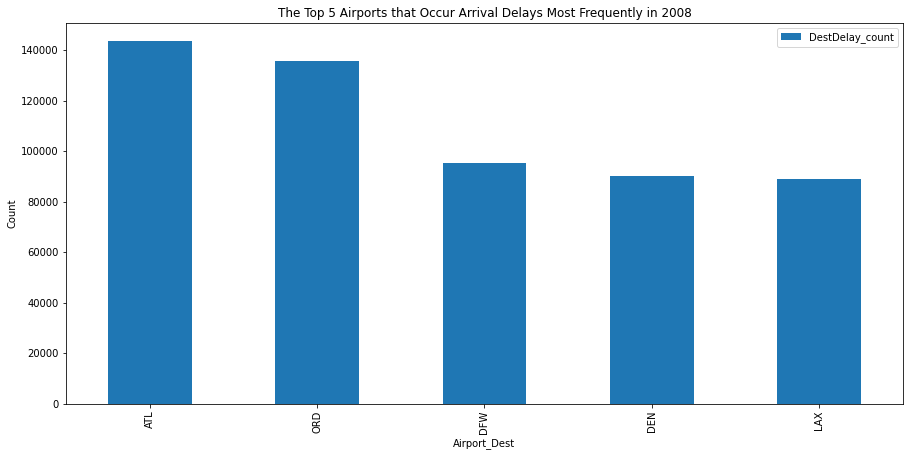

In [ ]:
ax = data_des_count_top5.plot(x='Airport_Dest', y='DestDelay_count', kind="bar", figsize=(15,7))
ax.set_title("The Top 5 Airports that Occur Arrival Delays Most Frequently in 2008")
ax.set_ylabel('Count')

In [ ]:
data_ori_count_least5 = data_ori_count.sort_values('OriginDelay_count').head(5)
data_des_count_least5 = data_des_count.sort_values('DestDelay_count').head(5)

In [ ]:
data_ori_count_least5

,Airport_Origin,OriginDelay_count
297,PUB,2
302,PIR,3
241,TUP,3
295,INL,11
294,BJI,12


In [ ]:
data_des_count_least5

,Airport_Dest,DestDelay_count
212,OGD,1
243,TUP,1
289,CYS,1
297,BJI,15
296,INL,18


Text(0, 0.5, 'Count')

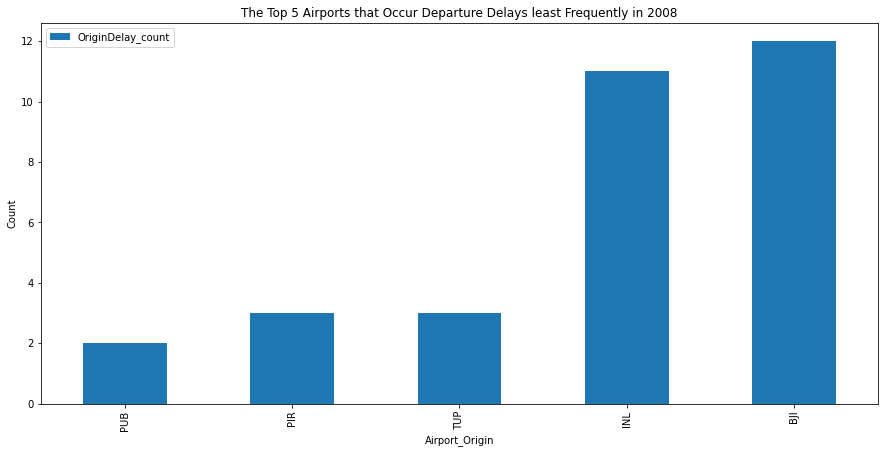

In [ ]:
ax = data_ori_count_least5.plot(x='Airport_Origin', y='OriginDelay_count', kind="bar", figsize=(15,7))
ax.set_title("The Top 5 Airports that Occur Departure Delays least Frequently in 2008")
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

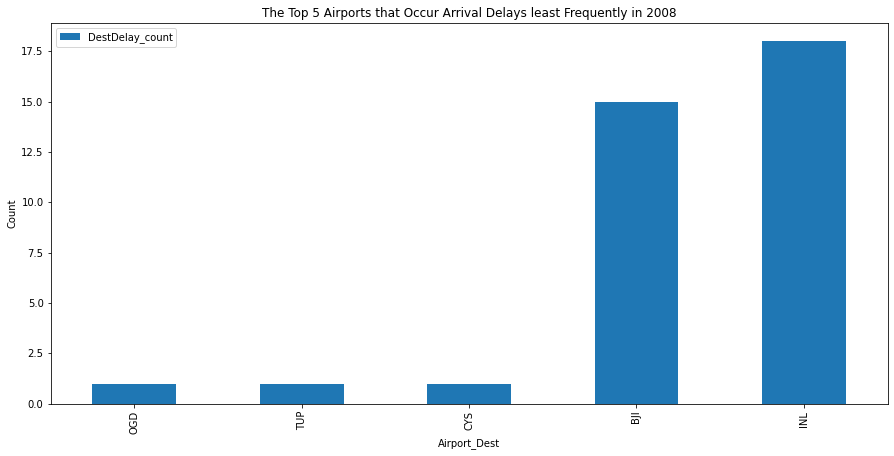

In [ ]:
ax = data_des_count_least5.plot(x='Airport_Dest', y='DestDelay_count', kind="bar", figsize=(15,7))
ax.set_title("The Top 5 Airports that Occur Arrival Delays least Frequently in 2008")
ax.set_ylabel('Count')

The top 5 airports that occurs delay the most times are the same for departure delay and arrival delay in 2008, which are

1.   ATL - William B Hartsfield-Atlanta Intl Airport in Atlanta

2.   ORD - Chicago O’Hare International Airport in Chicago

3.   DFW - Dallas-Fort Worth International Airport in Dallas-Fort Worth

4.   DEN - Denver Intl Airport in Denver

5.   LAX - Los Angeles International in Los Angeles

The top 5 airports that occurs the least times of departure delay and arrival delay in 2008, which are

o	The Top 5 Airports that Occur Departure Delays least Frequently in 2008
1.	PUB - Pueblo Memorial Airport in Colorado
2.	PIR - Pierre Regional Airport in South Dakota
3.	TUP - Tupelo Regional Airport in Mississippi
4.	INL - Falls International Airport in Minnesota
5.	BJI - Bemidji Regional Airport in Minnesota

o	The Top 5 Airports that Occur Arrival Delays least Frequently in 2008
1.	OGD - Ogden-Hinckley Airport in Utah
2.	CYS - Cheyenne Regional Airport in Wyoming 
3.	TUP - Tupelo Regional Airport in Mississippi
4.	PIR - Pierre Regional Airport in South Dakota 
5.	BJI - Bemidji Regional Airport in Minnesota


### Python

In [6]:
import pandas as pd
path = '/content/drive/MyDrive/01_GMBA/2nd_semester(2022)/03-1AM_Big Data Analytics Techniques and Applications/0323_0406HW2/HW2/dataset/2008.csv'
data_q3 = pd.read_csv(path, thousands=',', encoding='latin1')
data_q3

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009723,2008,12,13,6,1002.0,959,1204.0,1150,DL,1636,...,6.0,45.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009724,2008,12,13,6,834.0,835,1021.0,1023,DL,1637,...,5.0,23.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009725,2008,12,13,6,655.0,700,856.0,856,DL,1638,...,24.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,...,13.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [7]:
data1 = data_q3[['Month', 'ArrDelay', 'DepDelay', 'Origin', 'Dest']]
data1

,Month,ArrDelay,DepDelay,Origin,Dest
0,1,-14.0,8.0,IAD,TPA
1,1,2.0,19.0,IAD,TPA
2,1,14.0,8.0,IND,BWI
3,1,-6.0,-4.0,IND,BWI
4,1,34.0,34.0,IND,BWI
...,...,...,...,...,...
7009723,12,14.0,3.0,ATL,IAD
7009724,12,-2.0,-1.0,ATL,SAT
7009725,12,0.0,-5.0,PBI,ATL
7009726,12,9.0,11.0,IAD,ATL


In [8]:
data1.isnull().sum()

Month            0
ArrDelay    154699
DepDelay    136246
Origin           0
Dest             0
dtype: int64

In [9]:
data1['Origin'].nunique()

303

In [10]:
data1['Dest'].nunique()

304

In [11]:
data_ori = pd.unique(data1['Origin'])
data_des = pd.unique(data1['Dest'])

OriginDelay_count = []
DestDelay_count = []
Origin = []
Dest = []
for i in data_ori:
  Origin.append(i)
  A = data1[data1["Origin"]==i]
  B = A[A["ArrDelay"]>0]
  OriginDelay_count.append(B['Origin'].count())

for j in data_des:
  Dest.append(j)
  A1 = data1[data1["Dest"]==j]
  B1 = A1[A1["DepDelay"]>0]
  DestDelay_count.append(B1['Dest'].count())

In [12]:
d1 = {'Airport_Origin': Origin, 'OriginDelay_count': OriginDelay_count}
data_ori_count = pd.DataFrame(data=d1)
data_ori_count

,Airport_Origin,OriginDelay_count,OriginDelay_Max,OriginDelay_Min
0,IAD,34835,855.0,1.0
1,IND,16883,1020.0,1.0
2,ISP,3885,823.0,1.0
3,JAN,4759,562.0,1.0
4,JAX,12891,509.0,1.0
...,...,...,...,...
298,LMT,251,418.0,1.0
299,OTH,357,323.0,1.0
300,ITH,89,241.0,1.0
301,HTS,21,124.0,2.0


In [13]:
d2 = {'Airport_Dest': Dest, 'DestDelay_count': DestDelay_count}
data_des_count = pd.DataFrame(data=d2)
data_des_count

,Airport_Dest,DestDelay_count,DestDelay_Max,DestDelay_Min
0,TPA,33863,867.0,1.0
1,BWI,44961,878.0,1.0
2,JAX,13264,912.0,1.0
3,LAS,76174,843.0,1.0
4,MCI,26422,668.0,1.0
...,...,...,...,...
299,LMT,223,224.0,1.0
300,OTH,272,286.0,1.0
301,ITH,21,71.0,1.0
302,HTS,38,85.0,5.0


In [14]:
data_ori_count_top5 = data_ori_count.sort_values('OriginDelay_count', ascending=False).head(5)
data_des_count_top5 = data_des_count.sort_values('DestDelay_count', ascending=False).head(5)

In [16]:
data_ori_count_top5[['Airport_Origin', 'OriginDelay_count']]

,Airport_Origin,OriginDelay_count
115,ATL,204157
66,ORD,167536
116,DFW,134254
57,DEN,110344
6,LAX,86615


In [17]:
data_des_count_top5[['Airport_Dest', 'DestDelay_count']]

,Airport_Dest,DestDelay_count
72,ATL,143629
112,ORD,135780
87,DFW,95262
27,DEN,89988
32,LAX,89000


Text(0, 0.5, 'Count')

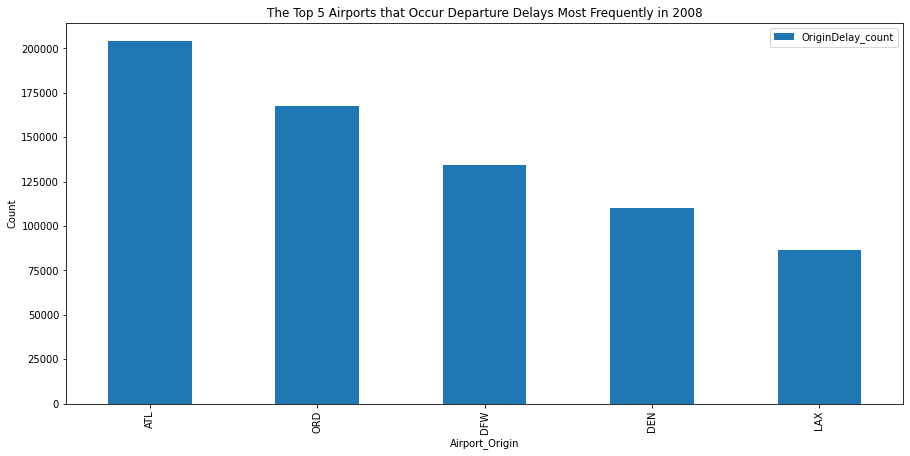

In [18]:
ax = data_ori_count_top5.plot(x='Airport_Origin', y='OriginDelay_count', kind="bar", figsize=(15,7))
ax.set_title("The Top 5 Airports that Occur Departure Delays Most Frequently in 2008")
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

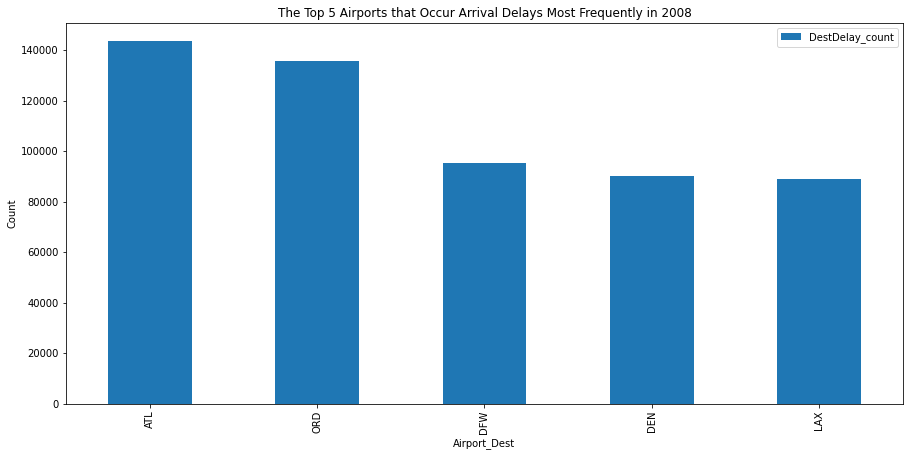

In [19]:
ax = data_des_count_top5.plot(x='Airport_Dest', y='DestDelay_count', kind="bar", figsize=(15,7))
ax.set_title("The Top 5 Airports that Occur Arrival Delays Most Frequently in 2008")
ax.set_ylabel('Count')

In [20]:
data_ori_count_least5 = data_ori_count.sort_values('OriginDelay_count').head(5)
data_des_count_least5 = data_des_count.sort_values('DestDelay_count').head(5)

In [21]:
data_ori_count_least5[['Airport_Origin', 'OriginDelay_count']]

,Airport_Origin,OriginDelay_count
297,PUB,2
302,PIR,3
241,TUP,3
295,INL,11
294,BJI,12


In [22]:
data_des_count_least5[['Airport_Dest', 'DestDelay_count']]

,Airport_Dest,DestDelay_count
212,OGD,1
289,CYS,1
243,TUP,1
303,PIR,3
297,BJI,15


Text(0, 0.5, 'Count')

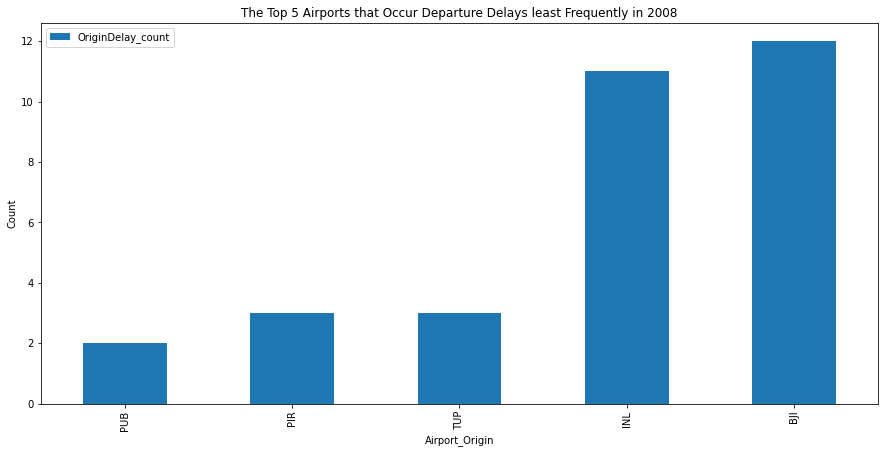

In [23]:
ax = data_ori_count_least5.plot(x='Airport_Origin', y='OriginDelay_count', kind="bar", figsize=(15,7))
ax.set_title("The Top 5 Airports that Occur Departure Delays least Frequently in 2008")
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

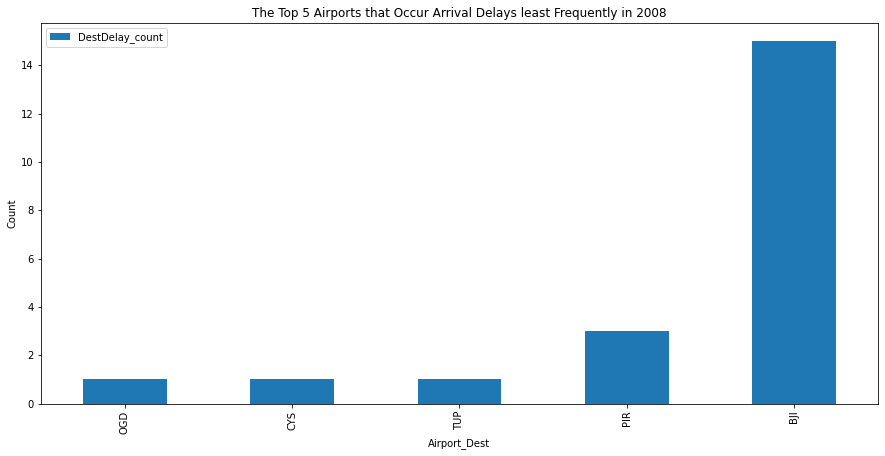

In [24]:
ax = data_des_count_least5.plot(x='Airport_Dest', y='DestDelay_count', kind="bar", figsize=(15,7))
ax.set_title("The Top 5 Airports that Occur Arrival Delays least Frequently in 2008")
ax.set_ylabel('Count')

The top 5 airports that occurs delay the most times are the same for departure delay and arrival delay in 2008, which are

1.   ATL - William B Hartsfield-Atlanta Intl Airport in Atlanta

2.   ORD - Chicago O’Hare International Airport in Chicago

3.   DFW - Dallas-Fort Worth International Airport in Dallas-Fort Worth

4.   DEN - Denver Intl Airport in Denver

5.   LAX - Los Angeles International in Los Angeles

The top 5 airports that occurs the least times of departure delay and arrival delay in 2008, which are

o	The Top 5 Airports that Occur Departure Delays least Frequently in 2008
1.	PUB - Pueblo Memorial Airport in Colorado
2.	PIR - Pierre Regional Airport in South Dakota
3.	TUP - Tupelo Regional Airport in Mississippi
4.	INL - Falls International Airport in Minnesota
5.	BJI - Bemidji Regional Airport in Minnesota

o	The Top 5 Airports that Occur Arrival Delays least Frequently in 2008
1.	OGD - Ogden-Hinckley Airport in Utah
2.	CYS - Cheyenne Regional Airport in Wyoming 
3.	TUP - Tupelo Regional Airport in Mississippi
4.	PIR - Pierre Regional Airport in South Dakota 
5.	BJI - Bemidji Regional Airport in Minnesota

